# TZ3108 is an [18F] Tracer Studied in Non-human Primates

## Setup

In [56]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Huang1980Model import Huang1980Model
from Ichise2002VascModel import Ichise2002VascModel
from Ichise2002Model import Ichise2002Model
from TZ3108 import TZ3108

In [57]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "TZ3108", "derivatives", "sub-ollie", "ses-20230516", "pet")
twil = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif.nii.gz")
pet = os.path.join(petdir, "sub-ollie_ses-20230516_trc-tz3108_proc-verified-tacs.nii.gz")

huang = TZ3108(twil,
               pet,
               truths=[0.5, 0.002, 0.005, 0.0001, 9.066, -43.959, 0.021],
               nlive=30,
               tag="main-tz3108-huang-30",
               model="Huang1980Model")

# Parameter 0: 0.476 [0.423, 0.499]
# Parameter 1: 0.094 [0.082, 0.100]
# Parameter 2: 0.005 [0.005, 0.005]
# Parameter 3: 0.000 [0.000, 0.000]
# Parameter 4: 9.066 [7.285, 10.642]
# Parameter 5: -43.959 [-45.842, -41.835]
# Parameter 6: 0.021 [0.020, 0.023]

ichise_vasc = TZ3108(twil,
                     pet,
                     truths=[0.5, 0.002, 0.005, 0.0001, 0.05, 50, 9.066, -43.959, 0.021],
                     nlive=30,
                     tag="main-tz3108-ichise-vasc-30",
                     model="Ichise2002VascModel")








parc_index = 1  # whole brain

TrivialArtery: found data for tracer tz3108
{'fqfp': '/Users/jjlee/Singularity/TZ3108/derivatives/sub-ollie/ses-20230516/pet/sub-ollie_ses-20230516_trc-tz3108_proc-verified-aif',
 'halflife': 6586.236,
 'img': array([0.00135276, 0.00135276, 0.00135276, ..., 0.51100743, 0.51100743,
       0.51100743]),
 'nii': <nibabel.nifti1.Nifti1Image object at 0x3429f28b0>,
 'taus': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'times': array([1.99999998e+00, 7.99999998e+00, 1.40000000e+01, 1.90000000e+01,
       2.60000000e+01, 3.20000000e+01, 3.70000000e+01, 4.40000000e+01,
       5.00000000e+01, 5.50000000e+01, 6.50000000e+01, 7.60000000e+01,
       8.60000000e+01, 9.60000000e+01, 1.06000000e+02, 1.16000000e+02,
       1.76000000e+02, 2.36000000e+02, 2.96000000e+02, 5.97000000e+02,
       8.96000000e+02, 1.19600000e+03, 1.49600000e+03, 1.79600000e+03,
       2.09600000e+03, 2.39600000e+03, 2.696

## Inspect Huang1980Model twil

In [58]:
v = huang.truths
pprint("===================================== v ======================================")
pprint(v)

data = huang.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.5, 0.002, 0.005, 0.0001, 9.066, -43.959, 0.021]
'==================================== data ===================================='
{'delta_time': 1,
 'halflife': 6586.236,
 'inputFuncInterp': array([0.4268609 , 0.43574468, 0.44462846, ..., 0.00257043, 0.00257043,
       0.00257043]),
 'martinv1': array(0.05),
 'raichleks': None,
 'rho': array([0.05030765, 0.20492752, 0.26810379, 0.31791721, 0.36089407,
       0.39554433, 0.42073949, 0.44944175, 0.47624623, 0.4882847 ,
       0.50720296, 0.52577618, 0.53815782, 0.54771692, 0.55232654,
       0.56678915, 0.56784485, 0.554537  , 0.5588467 , 0.56648747,
       0.57245858, 0.5729663 , 0.58177737, 0.58568642, 0.5846651 ,
       0.58457538, 0.59434298, 0.59176   , 0.59305701, 0.59751712,
       0.60056097, 0.59913174, 0.60304843, 0.6029013 , 0.60363644,
       0.60206108, 0.60255149, 0.60795286, 0.61141793, 0.61135952,
       0.61046876, 0.61424653]),
 'rhoUsesB

In [59]:
pprint("============================== huang.data2t(data) ===============================")
pprint(huang.data2t(data))
pprint("============================= huang.data2taus(data) =============================")
pprint(huang.data2taus(data))
pprint("=========================== huang.data2timesMid(data) ===========================")
pprint(huang.data2timesMid(data))
pprint("================================== huang.fqfp ===================================")
pprint(huang.fqfp)
pprint("========================== huang.input_function() =========================")
pprint(huang.input_function())
pprint("================================= huang.labels ==================================")
pprint(huang.labels)
pprint("====================== huang.load_nii(huang.fqfp + '.nii.gz') ======================")
pprint(huang.load_nii(huang.fqfp + ".nii.gz"))
pprint("=============================== huang.loglike(v) ================================")
pprint(huang.loglike(v))
pprint("================================== huang.ndim ===================================")
pprint(huang.ndim)
pprint("========================= huang.parse_halflife(huang.fqfp) =========================")
pprint(huang.parse_halflife(huang.fqfp))
pprint("========================= huang.parse_isotope(huang.fqfp) ==========================")
pprint(huang.parse_isotope(huang.fqfp))
pprint("================================== huang.sigma ==================================")
pprint(huang.sigma)
pprint("============================ huang.signalmodel(data) ============================")
pprint(huang.signalmodel(data))

('============================== huang.data2t(data) '
 '===============================')
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0797e+04, 1.0798e+04,
       1.0799e+04])
('============================= huang.data2taus(data) '
 '=============================')
array([ 60.   ,  60.   ,  60.   , 120.   , 120.   , 120.   , 120.   ,
       180.   , 180.   , 180.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 300.   ,
       300.   , 300.   , 300.   , 300.   , 300.   , 300.   , 299.474])
('=========================== huang.data2timesMid(data) '
 '===========================')
array([   30.   ,    90.   ,   150.   ,   240.   ,   360.   ,   480.   ,
         600.   ,   750.   ,   930.   ,  1110.   ,  1350.   ,  1650.   ,
        1950.   ,  2250.   ,  2550.   ,  2850.   ,  3150.   ,  3450.   

## Plot Huang1980Model twil

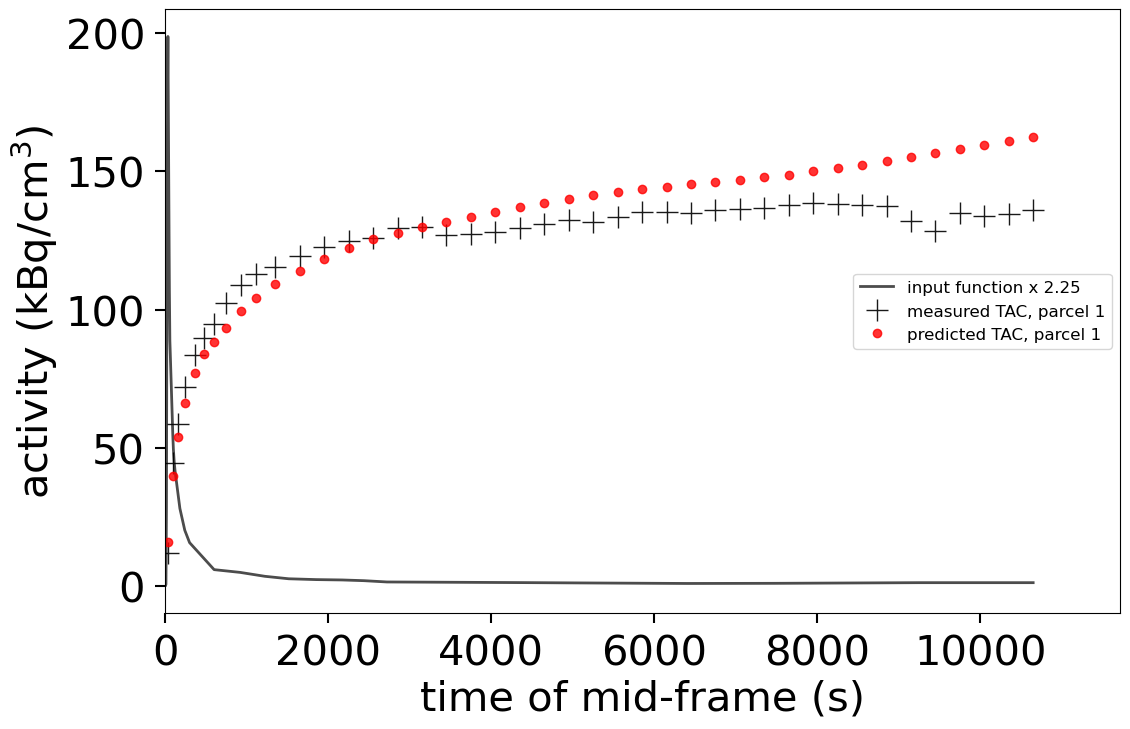

In [60]:
huang.plot_truths(parc_index=parc_index)

In [61]:
huang.truths

[0.5, 0.002, 0.005, 0.0001, 9.066, -43.959, 0.021]

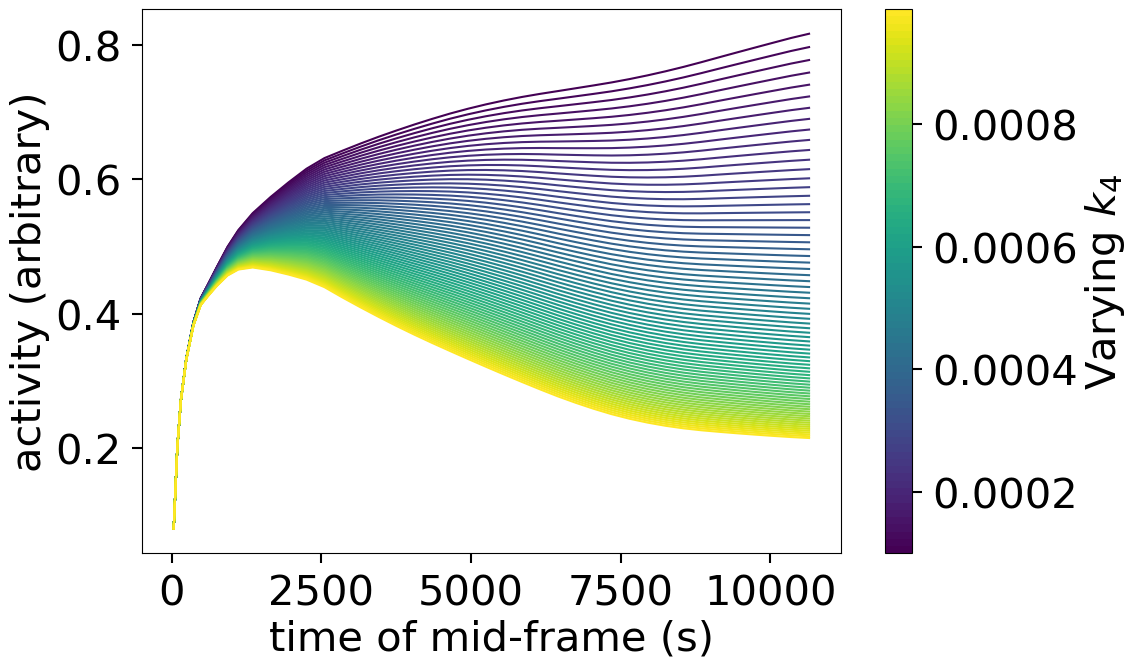

In [63]:
huang.plot_variations(3, 0.0001, 0.001, huang.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_twil = huang.run_nested_for_indexed_tac(parc_index, print_progress=True)
huang.save_results(res_twil, "playground-for-H1980M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(huang.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 133 | batch: 0 | bound: 2 | nc: 78 | ncall: 1994 | eff(%):  6.571 | loglstar:   -inf < -172.772 <    inf | logz: -178.786 +/-  0.410 | dlogz: 51.315 >  0.010                                   

## Inspect Ichise2002VascModel twil

In [ ]:
v = mm_idif.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_idif.data(v)
pprint("==================================== data ====================================")
pprint(data)

In [ ]:
pprint("============================== mm_idif.data2t(data) ===============================")
pprint(mm_idif.data2t(data))
pprint("============================= mm_idif.data2taus(data) =============================")
pprint(mm_idif.data2taus(data))
pprint("=========================== mm_idif.data2timesMid(data) ===========================")
pprint(mm_idif.data2timesMid(data))
pprint("================================== mm_idif.fqfp ===================================")
pprint(mm_idif.fqfp)
pprint("========================== mm_idif.input_function() =========================")
pprint(mm_idif.input_function())
pprint("================================= mm_idif.labels ==================================")
pprint(mm_idif.labels)
pprint("====================== mm_idif.load_nii(mm_idif.fqfp + '.nii.gz') ======================")
pprint(mm_idif.load_nii(mm_idif.fqfp + ".nii.gz"))
pprint("=============================== mm_idif.loglike(v) ================================")
pprint(mm_idif.loglike(v))
pprint("================================== mm_idif.ndim ===================================")
pprint(mm_idif.ndim)
pprint("========================= mm_idif.parse_halflife(mm_idif.fqfp) =========================")
pprint(mm_idif.parse_halflife(mm_idif.fqfp))
pprint("========================= mm_idif.parse_isotope(mm_idif.fqfp) ==========================")
pprint(mm_idif.parse_isotope(mm_idif.fqfp))
pprint("================================== mm_idif.sigma ==================================")
pprint(mm_idif.sigma)
pprint("============================ mm_idif.signalmodel(data) ============================")
pprint(mm_idif.signalmodel(data))

## Plot Huang1980Model idif

In [ ]:
mm_idif.plot_truths(parc_index=parc_index)

In [ ]:
mm_idif.plot_variations(2, 0, 0.01 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo
res_idif = mm_idif.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_idif.save_results(res_idif, "playground-for-H1980M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results